In [ ]:
 
    ##balance dataset
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc

from sklearn.model_selection import StratifiedKFold
import scipy.io as spio
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

mat = spio.loadmat('/home/shruti/Documents/histogram/files/75_frame/data_new.mat', squeeze_me=True)
random_state = np.random.RandomState(0)
a=mat['x2']
frames = 75
X=a[:,0:39]
X = preprocessing.scale(X)
print('total samples', X.shape)

Y=a[:,-1]
n_classes = 2
n_samples, n_features = X.shape
print(n_classes)
s = np.count_nonzero(Y)
print('number of stress examples', s)


n_samples, n_features = X.shape
print(n_samples)
print(n_features)
# Add noisy features
random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
#print(X.shape)
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
print('stratified', cv)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
print('mean',mean_fpr)
fig, ax = plt.subplots()
acc1 = []
F1 = []
precision =[]
recall = []
for i, (train, test) in enumerate(cv.split(X, Y)):
    classifier.fit(X[train], Y[train])
    y_pred=classifier.predict(X[test])
    print('x_train number', X[train].shape)
    print('Y_train number', Y[train].shape)
    viz =  metrics.plot_roc_curve(classifier, X[test], Y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    print('x_test number', X[test].shape)
    print('Y_test number', Y[test].shape)
    sp = np.count_nonzero(Y[test])
    print('number of stress examples', sp)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    a =roc_auc_score(Y[test], y_score)
    print(a)
    acc=100*sum((y_pred-Y[test])==0)/len(Y[test])
    print('accuracy', acc) 
    acc1.append(acc)
    print(classification_report(Y[test],y_pred))
    print('binary', precision_recall_fscore_support(Y[test],y_pred, average='binary'))
    print('macro', precision_recall_fscore_support(Y[test],y_pred, average='macro'))
    print('micro', precision_recall_fscore_support(Y[test],y_pred, average='micro'))
    print('weighted', precision_recall_fscore_support(Y[test],y_pred, average='weighted'))
    F12 = precision_recall_fscore_support(Y[test],y_pred, average='macro')
    F1.append(F12[2])
    recall.append(F12[1])
    precision.append(F12[0])
    class_names = ['stress','non-stress']
    cm = confusion_matrix(Y[test],y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

print(F1)
b = statistics.mean(F1)
print('FINAL f1 SCORE', b)
print(acc1)
new = statistics.mean(acc1)
print('Final accuracy', new)
c = statistics.mean(recall)
print('recall mean', c)
cd = statistics.mean(precision)
print('precision mean', cd)
f = open(outputfile, "a")
f.write("--------------------------------------------------------------\n")
f.write("SVM results\n")
print("results of %f (frames), %f (Total sample), %f (stress sample), %f (acc),%f (F1 score), %f (precision), %f (recall), %f (AUC)" % (frames, Total_sample,s,b,new,c,cd,mean_auc))
print()

f.close()

total samples (7236, 39)
2
number of stress examples 2757
7236
39
stratified StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
mean [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.767676

/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


x_train number (5789, 39)
Y_train number (5789,)
x_test number (1447, 39)
Y_test number (1447,)
number of stress examples 552
0.504534045826249
accuracy 61.85210780926054
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       895
         1.0       0.00      0.00      0.00       552

    accuracy                           0.62      1447
   macro avg       0.31      0.50      0.38      1447
weighted avg       0.38      0.62      0.47      1447

binary (0.0, 0.0, 0.0, None)
macro (0.3092605390463027, 0.5, 0.3821520068317677, None)
micro (0.6185210780926054, 0.6185210780926054, 0.6185210780926054, None)
weighted (0.3825683240448388, 0.6185210780926054, 0.4727381425216753, None)


/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


x_train number (5789, 39)
Y_train number (5789,)
x_test number (1447, 39)
Y_test number (1447,)
number of stress examples 551
0.4746362133782733
accuracy 61.92121630960608
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       896
         1.0       0.00      0.00      0.00       551

    accuracy                           0.62      1447
   macro avg       0.31      0.50      0.38      1447
weighted avg       0.38      0.62      0.47      1447

binary (0.0, 0.0, 0.0, None)
macro (0.30960608154803043, 0.5, 0.3824157063593684, None)
micro (0.6192121630960609, 0.6192121630960609, 0.6192121630960609, None)
weighted (0.3834237029261026, 0.6192121630960609, 0.47359291347338506, None)


/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


x_train number (5789, 39)
Y_train number (5789,)
x_test number (1447, 39)
Y_test number (1447,)
number of stress examples 551
0.5020822530464092
accuracy 61.92121630960608
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       896
         1.0       0.00      0.00      0.00       551

    accuracy                           0.62      1447
   macro avg       0.31      0.50      0.38      1447
weighted avg       0.38      0.62      0.47      1447

binary (0.0, 0.0, 0.0, None)
macro (0.30960608154803043, 0.5, 0.3824157063593684, None)
micro (0.6192121630960609, 0.6192121630960609, 0.6192121630960609, None)
weighted (0.3834237029261026, 0.6192121630960609, 0.47359291347338506, None)


/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


x_train number (5789, 39)
Y_train number (5789,)
x_test number (1447, 39)
Y_test number (1447,)
number of stress examples 551
0.5048633166969148
accuracy 61.92121630960608
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       896
         1.0       0.00      0.00      0.00       551

    accuracy                           0.62      1447
   macro avg       0.31      0.50      0.38      1447
weighted avg       0.38      0.62      0.47      1447

binary (0.0, 0.0, 0.0, None)
macro (0.30960608154803043, 0.5, 0.3824157063593684, None)
micro (0.6192121630960609, 0.6192121630960609, 0.6192121630960609, None)
weighted (0.3834237029261026, 0.6192121630960609, 0.47359291347338506, None)


/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shruti/anaconda3/envs/tensorflow_new/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


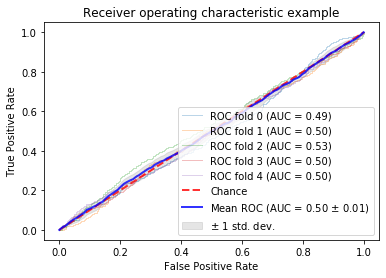

[0.3822525597269624, 0.3821520068317677, 0.3824157063593684, 0.3824157063593684, 0.3824157063593684]
FINAL f1 SCORE 0.3823303371273671
[61.87845303867403, 61.85210780926054, 61.92121630960608, 61.92121630960608, 61.92121630960608]
Final accuracy 61.89884195535056
recall mean 0.5
precision mean 0.30949420977675285


NameError: name 'Total_sample' is not defined

In [3]:
 
    ##balance dataset
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc

from sklearn.model_selection import StratifiedKFold
import scipy.io as spio
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

mat = spio.loadmat('/home/shruti/Documents/histogram/MFCC/CRD_pooling/80_frame/data.mat', squeeze_me=True)
outputfile = '/home/shruti/Documents/histogram/MFCC/CRD_pooling/80_frame/file.txt'
a=mat['ans']

frames = 80
X=a[:,0:39]
X = preprocessing.scale(X)
print('total samples', X.shape)

Y=a[:,-1]
n_classes = 2
n_samples, n_features = X.shape
print(n_classes)
s = np.count_nonzero(Y)
print('number of stress examples', s)


n_samples, n_features = X.shape
print(n_samples)
print(n_features)
# Add noisy features
random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
#print(X.shape)
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
print('stratified', cv)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
print('mean',mean_fpr)
fig, ax = plt.subplots()
acc1 = []
F1 = []
precision =[]
recall = []
for i, (train, test) in enumerate(cv.split(X, Y)):
    classifier.fit(X[train], Y[train])
    y_pred=classifier.predict(X[test])
    print('x_train number', X[train].shape)
    print('Y_train number', Y[train].shape)
    viz =  metrics.plot_roc_curve(classifier, X[test], Y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    print('x_test number', X[test].shape)
    print('Y_test number', Y[test].shape)
    sp = np.count_nonzero(Y[test])
    print('number of stress examples', sp)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    a =roc_auc_score(Y[test], y_score)
    print(a)
    acc=100*sum((y_pred-Y[test])==0)/len(Y[test])
    print('accuracy', acc) 
    acc1.append(acc)
    print(classification_report(Y[test],y_pred))
    print('binary', precision_recall_fscore_support(Y[test],y_pred, average='binary'))
    print('macro', precision_recall_fscore_support(Y[test],y_pred, average='macro'))
    print('micro', precision_recall_fscore_support(Y[test],y_pred, average='micro'))
    print('weighted', precision_recall_fscore_support(Y[test],y_pred, average='weighted'))
    F12 = precision_recall_fscore_support(Y[test],y_pred, average='macro')
    F1.append(F12[2])
    recall.append(F12[1])
    precision.append(F12[0])
    class_names = ['stress','non-stress']
    cm = confusion_matrix(Y[test],y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

print(F1)
b = statistics.mean(F1)
print('FINAL f1 SCORE', b)
print(acc1)
new = statistics.mean(acc1)
print('Final accuracy', new)
c = statistics.mean(recall)
print('recall mean', c)
cd = statistics.mean(precision)
print('precision mean', cd)
f = open(outputfile, "a")
f.write("--------------------------------------------------------------\n")
f.write("SVM results\n")
print("results of %f (frames), %f (Total sample), %f (stress sample), %f (acc),%f (F1 score), %f (precision), %f (recall), %f (AUC)" % (frames, Total_sample,s,b,new,c,cd,mean_auc))
print()

f.close()

In [ ]:
##balance dataset
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc

from sklearn.model_selection import StratifiedKFold
import scipy.io as spio
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

mat = spio.loadmat('/home/shruti/Documents/histogram/files/75_frame/data_new.mat', squeeze_me=True)
random_state = np.random.RandomState(0)
a=mat['x2']

X=a[:,0:39]
X = preprocessing.scale(X)
print('total samples', X.shape)

Y=a[:,-1]
n_classes = 2
n_samples, n_features = X.shape
print(n_classes)
s = np.count_nonzero(Y)
print('number of stress examples', s)


n_samples, n_features = X.shape
print(n_samples)
print(n_features)
# Add noisy features
random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
#print(X.shape)
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=3)
print('stratified', cv)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
print('mean',mean_fpr)
fig, ax = plt.subplots()
acc1 = []
F1 = []
precision =[]
recall = []
for i, (train, test) in enumerate(cv.split(X, Y)):
    classifier.fit(X[train], Y[train])
    y_pred=classifier.predict(X[test])
    print('x_train number', X[train].shape)
    print('Y_train number', Y[train].shape)
    viz =  metrics.plot_roc_curve(classifier, X[test], Y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    print('x_test number', X[test].shape)
    print('Y_test number', Y[test].shape)
    sp = np.count_nonzero(Y[test])
    print('number of stress examples', sp)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    a =roc_auc_score(Y[test], y_score)
    print(a)
    acc=100*sum((y_pred-Y[test])==0)/len(Y[test])
    print('accuracy', acc) 
    acc1.append(acc)
    print(classification_report(Y[test],y_pred))
    print('binary', precision_recall_fscore_support(Y[test],y_pred, average='binary'))
    print('macro', precision_recall_fscore_support(Y[test],y_pred, average='macro'))
    print('micro', precision_recall_fscore_support(Y[test],y_pred, average='micro'))
    print('weighted', precision_recall_fscore_support(Y[test],y_pred, average='weighted'))
    F12 = precision_recall_fscore_support(Y[test],y_pred, average='weighted')
    F1.append(F12[2])
    recall.append(F12[1])
    precision.append(F12[0])
    class_names = ['stress','non-stress']
    cm = confusion_matrix(Y[test],y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

print(F1)
b = statistics.mean(F1)
print('FINAL f1 SCORE', b)
print(acc1)
new = statistics.mean(acc1)
print('Final accuracy', new)
c = statistics.mean(recall)
print('recall mean', c)
cd = statistics.mean(precision)
print('precision mean', cd)

In [ ]:
##balancedataset
import scipy.io as spio
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

kf = KFold(n_splits=10)
#kf.get_n_splits(X)
KFold(n_splits=10, random_state=None, shuffle=False)
mat = spio.loadmat('/home/shruti/Documents/histogram/files/1_frame/data_new.mat', squeeze_me=True)

a=mat['x2']

#a = np.random.shuffle(a)
# print(a.shape)
X=a[:,0:39]
X = preprocessing.scale(X)
print('total samples', X.shape)

Y=a[:,-1]

s = np.count_nonzero(Y)
print('number of stress examples', s)
# from numpy import array
acc1 = []
F1 = []
precision =[]
recall = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    
    y_train, y_test = Y[train_index], Y[test_index]
    clf = svm.SVC()
    clf.fit(X_train, y_train)  
    y_pred=clf.predict(X_test)
    acc=100*sum((y_pred-y_test)==0)/len(y_test)
    print('accuracy', acc) 
    acc1.append(acc)
    print(classification_report(y_test,y_pred))
    print('binary', precision_recall_fscore_support(y_test,y_pred, average='binary'))
    print('macro', precision_recall_fscore_support(y_test,y_pred, average='macro'))
    print('micro', precision_recall_fscore_support(y_test,y_pred, average='micro'))
    print('weighted', precision_recall_fscore_support(y_test,y_pred, average='weighted'))
   
    F12 = precision_recall_fscore_support(y_test,y_pred, average='weighted')
    F1.append(F12[2])
    recall.append(F12[1])
    precision.append(F12[0])
    class_names = ['stress','non-stress']
    cm = confusion_matrix(y_test,y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm_normalized, interpolation='nearest')
    plt.title("confusion matrix")
    plt.colorbar(shrink=1)
    tick_marks = np.arange(len(class_names))
    print(tick_marks)
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    print(cm)
print(F1)
b = statistics.mean(F1)
print('FINAL f1 SCORE', b)
print(acc1)
new = statistics.mean(acc1)
print('Final accuracy', new)
c = statistics.mean(recall)
print('recall mean', c)
cd = statistics.mean(precision)
print('precision mean', cd)

In [ ]:
import scipy.io as spio
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

mat = spio.loadmat('/home/shruti/Documents/histogram/files/75_frame/data_new.mat', squeeze_me=True)
random_state = np.random.RandomState(0)
a=mat['x2']

#a = np.random.shuffle(a)
# print(a.shape)
X=a[:,0:39]
X = preprocessing.scale(X)
print('total samples', X.shape)

Y=a[:,-1]
n_classes = 2
n_samples, n_features = X.shape
print(n_classes)
s = np.count_nonzero(Y)
print('number of stress examples', s)
# from numpy import array

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)
a =roc_auc_score(y_test, y_score)
print(a)

In [ ]:
##ROC with 10 fold cross validation

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import scipy.io as spio
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
# #############################################################################
# Data IO and generation




In [ ]:
#trying different performance measure
import scipy.io as spio
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

mat = spio.loadmat('/home/shruti/Documents/histogram/files/40_frame/data_new.mat', squeeze_me=True)
random_state = np.random.RandomState(0)
a=mat['x2']

#a = np.random.shuffle(a)
# print(a.shape)
X=a[:,0:39]
X = preprocessing.scale(X)
print('total samples', X.shape)

Y=a[:,-1]
n_classes = 2
n_samples, n_features = X.shape
print(n_classes)
s = np.count_nonzero(Y)
print('number of stress examples', s)
# from numpy import array

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)
a =roc_auc_score(y_test, y_score)
print(a)
kf = KFold(n_splits=10)
#kf.get_n_splits(X)
KFold(n_splits=10, random_state=None, shuffle=False)
mat = spio.loadmat('/home/shruti/Documents/histogram/files/1_frame/data_new.mat', squeeze_me=True)

a=mat['x2']

#a = np.random.shuffle(a)
# print(a.shape)
X=a[:,0:39]
X = preprocessing.scale(X)
print('total samples', X.shape)

Y=a[:,-1]

s = np.count_nonzero(Y)
print('number of stress examples', s)
# from numpy import array
acc1 = []
F1 = []
precision =[]
recall = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    
    y_train, y_test = Y[train_index], Y[test_index]
    clf = svm.SVC()
    clf.fit(X_train, y_train)  
    y_pred=clf.predict(X_test)
    acc=100*sum((y_pred-y_test)==0)/len(y_test)
    print('accuracy', acc) 
    acc1.append(acc)
    print(classification_report(y_test,y_pred))
    print('binary', precision_recall_fscore_support(y_test,y_pred, average='binary'))
    print('macro', precision_recall_fscore_support(y_test,y_pred, average='macro'))
    print('micro', precision_recall_fscore_support(y_test,y_pred, average='micro'))
    print('weighted', precision_recall_fscore_support(y_test,y_pred, average='weighted'))
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
    y_score = classifier.fit(x_train, y_train).decision_function(x_test)
    a =roc_auc_score(y_test, y_score)
    print(a)


In [ ]:
#original REcola SVM with preciison, recall
import scipy.io as spio
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

kf = KFold(n_splits=10)
#kf.get_n_splits(X)
KFold(n_splits=10, random_state=None, shuffle=False)
mat = spio.loadmat('/home/shruti/Documents/histogram/files/1_frame/data_new.mat', squeeze_me=True)

a=mat['x2']

#a = np.random.shuffle(a)
# print(a.shape)
X=a[:,0:39]
X = preprocessing.scale(X)
print('total samples', X.shape)

Y=a[:,-1]

s = np.count_nonzero(Y)
print('number of stress examples', s)
# from numpy import array
acc1 = []
F1 = []
precision =[]
recall = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    
    y_train, y_test = Y[train_index], Y[test_index]
    clf = svm.SVC()
    clf.fit(X_train, y_train)  
    y_pred=clf.predict(X_test)
    acc=100*sum((y_pred-y_test)==0)/len(y_test)
    print('accuracy', acc) 
    acc1.append(acc)
    print(classification_report(y_test,y_pred))
    print('binary', precision_recall_fscore_support(y_test,y_pred, average='binary'))
    print('macro', precision_recall_fscore_support(y_test,y_pred, average='macro'))
    print('micro', precision_recall_fscore_support(y_test,y_pred, average='micro'))
    print('weighted', precision_recall_fscore_support(y_test,y_pred, average='weighted'))
   
    F12 = precision_recall_fscore_support(y_test,y_pred, average='weighted')
    F1.append(F12[2])
    recall.append(F12[1])
    precision.append(F12[0])
    class_names = ['stress','non-stress']
    cm = confusion_matrix(y_test,y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm_normalized, interpolation='nearest')
    plt.title("confusion matrix")
    plt.colorbar(shrink=1)
    tick_marks = np.arange(len(class_names))
    print(tick_marks)
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    print(cm)
print(F1)
b = statistics.mean(F1)
print('FINAL f1 SCORE', b)
print(acc1)
new = statistics.mean(acc1)
print('Final accuracy', new)
c = statistics.mean(recall)
print('recall mean', c)
cd = statistics.mean(precision)
print('precision mean', cd)

In [ ]:
import scipy.io as spio
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
kf = KFold(n_splits=10)
#kf.get_n_splits(X)
KFold(n_splits=10, random_state=None, shuffle=False)
mat = spio.loadmat('/home/shruti/Documents/MFCC/CRD_pooling/2000_frame/data.mat', squeeze_me=True)

a=mat['ans']

#a = np.random.shuffle(a)
# print(a.shape)
X=a[:,0:39]
X = preprocessing.scale(X)
# print(X.shape)
print('total samples', X.shape)
Y=a[:,-1]
s = np.count_nonzero(Y)
print('number of stress examples', s)
# print(Y.shape)
# from numpy import array
acc1 = []
F1 = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    clf = svm.SVC()
    clf.fit(X_train, y_train)  
    y_pred=clf.predict(X_test)
    acc=100*sum((y_pred-y_test)==0)/len(y_test)
    print('accuracy', acc) 
    acc1.append(acc)
    print(classification_report(y_test,y_pred))
    print('binary', precision_recall_fscore_support(y_test,y_pred, average='binary'))
    print('macro', precision_recall_fscore_support(y_test,y_pred, average='macro'))
    print('micro', precision_recall_fscore_support(y_test,y_pred, average='micro'))
    print('weighted', precision_recall_fscore_support(y_test,y_pred, average='weighted'))
    F12 = precision_recall_fscore_support(y_test,y_pred, average='weighted')
    F1.append(F12[2])
    class_names = ['stress','non-stress']
    cm = confusion_matrix(y_test,y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm_normalized, interpolation='nearest')
    plt.title("confusion matrix")
    plt.colorbar(shrink=1)
    tick_marks = np.arange(len(class_names))
    print(tick_marks)
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    print(cm)
print(F1)
b = statistics.mean(F1)
print('FINAL f1 SCORE', b)
print(acc1)
new = statistics.mean(acc1)
print('Final accuracy', new)


In [ ]:
kfold = KFold(5, True, 1)
# enumerate splits
for train, test in kfold.split(a):
    #print('train: %s, test: %s' % (a[train], a[test]))
    X=a[:,0:39]
    X = preprocessing.scale(X)
    print(X.shape)
    Y=a[:,-3]
    print(Y.shape)
    clf = svm.SVC()
    clf.fit(train, train)  
    y_pred=clf.predict(x_test)
    acc=100*sum((y_pred-y_test)==0)/len(y_test)
    print(acc)

In [ ]:
import scipy.io as spio

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

mat = spio.loadmat('/home/shruti/Documents/histogram/files/10_frame/data_new.mat', squeeze_me=True)

a=mat['x2']
print(a.shape)
X=a[:,0:39]

X = preprocessing.scale(X)
print(X.shape)

Y=a[:,-3]
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)




In [ ]:
from sklearn import svm

clf = svm.SVC()

clf.fit(x_train, y_train)  

y_pred=clf.predict(x_test)

acc=100*sum((y_pred-y_test)==0)/len(y_test)

print(acc)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

class_names = ['stress','non-stress']
cm = confusion_matrix(y_test,y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=1)
tick_marks = np.arange(len(class_names))
print(tick_marks)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
print(cm)

In [ ]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

print(X.shape)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)


In [ ]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train, y_train)  

y_pred=clf.predict(X_test)

acc=100*sum((y_pred-y_test)==0)/len(y_test)

print(acc)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

class_names = iris.target_names
cm = confusion_matrix(y_test,y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
print(cm)

In [ ]:
import scipy.io as spio

from sklearn import preprocessing

import scipy.io
a = scipy.io.loadmat('/home/shruti/Documents/data.mat')
print(a.dtype)

#mat = spio.loadmat('/home/shruti/Documents/histogram/files/1_frame/data.mat', squeeze_me=True)
#print(mat)



X=a[:,0:39]

X = preprocessing.scale(X)

Y=a[:,40]

print(X.shape)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)

In [ ]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train, y_train)  

y_pred=clf.predict(X_test)

acc=100*sum((y_pred-y_test)==0)/len(y_test)

print(acc)

In [ ]:
import scipy.io as spio

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

mat = spio.loadmat('/home/shruti/Documents/data.mat', squeeze_me=True)

a=mat['x2']

X=a[:,0:39]

X = preprocessing.scale(X)
print(X.shape)
Y = mat['str_idx']
print(Y.shape)






x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop, SGD

from keras.datasets import mnist
import numpy as np

In [ ]:
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
from sklearn import svm

clf = svm.SVC()

clf.fit(x_train, y_train)  

y_pred=clf.predict(x_test)

acc=100*sum((y_pred-y_test)==0)/len(y_test)

print(acc)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Anger','Happy','Neutral','Sad']
cm = confusion_matrix(y_test,y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
print(cm)

In [ ]:
##balance dataset
import numpy as np
import statistics
from scipy import interp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc

from sklearn.model_selection import StratifiedKFold
import scipy.io as spio
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
files = ['1_frame', '2_frame']
for i in files:
    mat = spio.loadmat('/home/shruti/Documents/histogram/files/50_frame/data_new.mat', squeeze_me=True)
    random_state = np.random.RandomState(0)
    a=mat['x2']
    X=a[:,0:39]
    X = preprocessing.scale(X)
    print('total samples', X.shape)

    Y=a[:,-1]
    n_classes = 2
    n_samples, n_features = X.shape
    print(n_classes)
s = np.count_nonzero(Y)
print('number of stress examples', s)


n_samples, n_features = X.shape
print(n_samples)
print(n_features)
# Add noisy features
random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
#print(X.shape)
# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
print('stratified', cv)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
print('mean',mean_fpr)
fig, ax = plt.subplots()
acc1 = []
F1 = []
precision =[]
recall = []
for i, (train, test) in enumerate(cv.split(X, Y)):
    classifier.fit(X[train], Y[train])
    y_pred=classifier.predict(X[test])
    print('x_train number', X[train].shape)
    print('Y_train number', Y[train].shape)
    viz =  metrics.plot_roc_curve(classifier, X[test], Y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    print('x_test number', X[test].shape)
    print('Y_test number', Y[test].shape)
    sp = np.count_nonzero(Y[test])
    print('number of stress examples', sp)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
    a =roc_auc_score(Y[test], y_score)
    print(a)
    acc=100*sum((y_pred-Y[test])==0)/len(Y[test])
    print('accuracy', acc) 
    acc1.append(acc)
    print(classification_report(Y[test],y_pred))
    print('binary', precision_recall_fscore_support(Y[test],y_pred, average='binary'))
    print('macro', precision_recall_fscore_support(Y[test],y_pred, average='macro'))
    print('micro', precision_recall_fscore_support(Y[test],y_pred, average='micro'))
    print('weighted', precision_recall_fscore_support(Y[test],y_pred, average='weighted'))
    F12 = precision_recall_fscore_support(Y[test],y_pred, average='macro')
    F1.append(F12[2])
    recall.append(F12[1])
    precision.append(F12[0])
    class_names = ['stress','non-stress']
    cm = confusion_matrix(Y[test],y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     plt.imshow(cm_normalized, interpolation='nearest')
#     plt.title("confusion matrix")
#     plt.colorbar(shrink=1)
#     tick_marks = np.arange(len(class_names))
#     print(tick_marks)
#     plt.xticks(tick_marks, class_names, rotation=45)
#     plt.yticks(tick_marks, class_names)
    print(cm)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

print(F1)
b = statistics.mean(F1)
print('FINAL f1 SCORE', b)
print(acc1)
new = statistics.mean(acc1)
print('Final accuracy', new)
c = statistics.mean(recall)
print('recall mean', c)
cd = statistics.mean(precision)
print('precision mean', cd)

In [ ]:
import pandas as pd
df = pd.DataFrame({'Frames': ['4'],
                   'accuracy': ['75']})

df.to_csv('/home/shruti/Desktop/'+'results.csv', index = True,header = True)

In [ ]:
import pandas as pd
df2 =  pd.DataFrame({'Frames': ['8'],
                   'accuracy': ['80']})
df.append(df2, ignore_index=True )
df.to_csv('/home/shruti/Desktop/'+'results.csv')

In [ ]:
from __future__ import division
import os, sys
import numpy as np
##balance dataset
import numpy as np
import statistics
from scipy import interp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import scipy.io as spio
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import StratifiedKFold

    


result = []
root = '/home/shruti/Desktop/try/'
for path, subdirs, files in os.walk(root):
    for name in files:
        if name.endswith('.mat'):
            print(name)   
            
            mat = spio.loadmat(os.path.join(path,name), squeeze_me=True)

            random_state = np.random.RandomState(0)
            a=mat['x2']

            X=a[:,0:39]
            X = preprocessing.scale(X)
            print('total samples', X.shape)
            Total_sample = X.shape[0]
            Y=a[:,-1]
            n_classes = 2
            n_samples, n_features = X.shape
            print(n_classes)
            s = np.count_nonzero(Y)
            print('number of stress examples', s)


            n_samples, n_features = X.shape
            print(n_samples)
            print(n_features)
            # Add noisy features
            random_state = np.random.RandomState(0)
            #X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
            #print(X.shape)
            # #############################################################################
            # Classification and ROC analysis

            # Run classifier with cross-validation and plot ROC curves
            cv = StratifiedKFold(n_splits=5)
            print('stratified', cv)
            classifier = svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state)

            tprs = []
            aucs = []
            mean_fpr = np.linspace(0, 1, 100)
            print('mean',mean_fpr)
            fig, ax = plt.subplots()
            acc1 = []
            F1 = []
            precision =[]
            recall = []
            for i, (train, test) in enumerate(cv.split(X, Y)):
                classifier.fit(X[train], Y[train])
                y_pred=classifier.predict(X[test])
                print('x_train number', X[train].shape)
                print('Y_train number', Y[train].shape)
                viz =  metrics.plot_roc_curve(classifier, X[test], Y[test],
                                     name='ROC fold {}'.format(i),
                                     alpha=0.3, lw=1, ax=ax)
                print('x_test number', X[test].shape)
                print('Y_test number', Y[test].shape)
                sp = np.count_nonzero(Y[test])
                print('number of stress examples', sp)
                interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(viz.roc_auc)
                y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
                a =roc_auc_score(Y[test], y_score)
                print(a)
                acc=100*sum((y_pred-Y[test])==0)/len(Y[test])
                print('accuracy', acc) 
                acc1.append(acc)
                print(classification_report(Y[test],y_pred))
                print('binary', precision_recall_fscore_support(Y[test],y_pred, average='binary'))
                print('macro', precision_recall_fscore_support(Y[test],y_pred, average='macro'))
                print('micro', precision_recall_fscore_support(Y[test],y_pred, average='micro'))
                print('weighted', precision_recall_fscore_support(Y[test],y_pred, average='weighted'))
                F12 = precision_recall_fscore_support(Y[test],y_pred, average='macro')
                F1.append(F12[2])
                recall.append(F12[1])
                precision.append(F12[0])
                class_names = ['stress','non-stress']
                cm = confusion_matrix(Y[test],y_pred)
                cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            #     plt.imshow(cm_normalized, interpolation='nearest')
            #     plt.title("confusion matrix")
            #     plt.colorbar(shrink=1)
            #     tick_marks = np.arange(len(class_names))
            #     print(tick_marks)
            #     plt.xticks(tick_marks, class_names, rotation=45)
            #     plt.yticks(tick_marks, class_names)
                print(cm)

            ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                    label='Chance', alpha=.8)

            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = np.std(aucs)
            ax.plot(mean_fpr, mean_tpr, color='b',
                    label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                    lw=2, alpha=.8)

            std_tpr = np.std(tprs, axis=0)
            tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
            tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
            ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                            label=r'$\pm$ 1 std. dev.')

            ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
                   title="Receiver operating characteristic example")
            ax.legend(loc="lower right")
            plt.show()

            print(F1)
            b = statistics.mean(F1)
            print('FINAL f1 SCORE', b)
            print(acc1)
            new = statistics.mean(acc1)
            print('Final accuracy', new)
            c = statistics.mean(recall)
            print('recall mean', c)
            cd = statistics.mean(precision)
            print('precision mean', cd)
            
            
           
            result.append((path.split('/')[-1], Total_sample,s,b,new,c,cd,mean_auc))
            

np.savetxt("file_name_new_now.csv", result, delimiter=",", fmt='%s')


In [ ]:
            f = open(outputfile, "a")
            f.write("--------------------------------------------------------------\n")
            f.write("SVM results\n")
            print("results of  %f (Total sample), %f (stress sample), %f (acc),%f (F1 score), %f (precision), %f (recall), %f (AUC)" % (Total_sample,s,b,new,c,cd,mean_auc))
            print()
            f.write("results of  %f (Total sample), %f (stress sample), %f (acc),%f (F1 score), %f (precision), %f (recall), %f (AUC)\n" % (Total_sample,s,b,new,c,cd,mean_auc))
            f.write("\n")
            f.close()

In [ ]:
from __future__ import division
import os, sys
import numpy as np
##balance dataset
import numpy as np
import statistics
from scipy import interp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc

from sklearn.model_selection import StratifiedKFold
import scipy.io as spio
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import statistics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import StratifiedKFold

    



pathin = '/home/shruti/Desktop/try'

for dirname in os.listdir(pathin):
    print('dirname', dirname)
    print(os.listdir(pathin))
    print("Processing: %s/%s" % (pathin, dirname))
    print('subfolder',dirname)
    dirs = os.listdir("%s/%s"%(pathin, dirname))
    print('sub',dirs)
    for file in dirs:
        print('file',file)
        if file.endswith('.mat'):
            print('filenew %s/%s/%s' % (pathin, dirname, file))
    
            
            mat = spio.loadmat(os.path.join(pathin, dirname, file), squeeze_me=True)

            random_state = np.random.RandomState(0)
            a=mat['x2']

            X=a[:,0:39]
            X = preprocessing.scale(X)
            print('total samples', X.shape)
            Total_sample = X.shape[0]
            Y=a[:,-1]
            n_classes = 2
            n_samples, n_features = X.shape
            print(n_classes)
            s = np.count_nonzero(Y)
            print('number of stress examples', s)


            n_samples, n_features = X.shape
            print(n_samples)
            print(n_features)
            # Add noisy features
            random_state = np.random.RandomState(0)
            #X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
            #print(X.shape)
            # #############################################################################
            # Classification and ROC analysis

            # Run classifier with cross-validation and plot ROC curves
            cv = StratifiedKFold(n_splits=5)
            print('stratified', cv)
            classifier = svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state)

            tprs = []
            aucs = []
            mean_fpr = np.linspace(0, 1, 100)
            print('mean',mean_fpr)
            fig, ax = plt.subplots()
            acc1 = []
            F1 = []
            precision =[]
            recall = []
            for i, (train, test) in enumerate(cv.split(X, Y)):
                classifier.fit(X[train], Y[train])
                y_pred=classifier.predict(X[test])
                print('x_train number', X[train].shape)
                print('Y_train number', Y[train].shape)
                viz =  metrics.plot_roc_curve(classifier, X[test], Y[test],
                                     name='ROC fold {}'.format(i),
                                     alpha=0.3, lw=1, ax=ax)
                print('x_test number', X[test].shape)
                print('Y_test number', Y[test].shape)
                sp = np.count_nonzero(Y[test])
                print('number of stress examples', sp)
                interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(viz.roc_auc)
                y_score = classifier.fit(X[train], Y[train]).decision_function(X[test])
                a =roc_auc_score(Y[test], y_score)
                print(a)
                acc=100*sum((y_pred-Y[test])==0)/len(Y[test])
                print('accuracy', acc) 
                acc1.append(acc)
                print(classification_report(Y[test],y_pred))
                print('binary', precision_recall_fscore_support(Y[test],y_pred, average='binary'))
                print('macro', precision_recall_fscore_support(Y[test],y_pred, average='macro'))
                print('micro', precision_recall_fscore_support(Y[test],y_pred, average='micro'))
                print('weighted', precision_recall_fscore_support(Y[test],y_pred, average='weighted'))
                F12 = precision_recall_fscore_support(Y[test],y_pred, average='macro')
                F1.append(F12[2])
                recall.append(F12[1])
                precision.append(F12[0])
                class_names = ['stress','non-stress']
                cm = confusion_matrix(Y[test],y_pred)
                cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            #     plt.imshow(cm_normalized, interpolation='nearest')
            #     plt.title("confusion matrix")
            #     plt.colorbar(shrink=1)
            #     tick_marks = np.arange(len(class_names))
            #     print(tick_marks)
            #     plt.xticks(tick_marks, class_names, rotation=45)
            #     plt.yticks(tick_marks, class_names)
                print(cm)

            ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                    label='Chance', alpha=.8)

            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = np.std(aucs)
            ax.plot(mean_fpr, mean_tpr, color='b',
                    label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                    lw=2, alpha=.8)

            std_tpr = np.std(tprs, axis=0)
            tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
            tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
            ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                            label=r'$\pm$ 1 std. dev.')

            ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
                   title="Receiver operating characteristic example")
            ax.legend(loc="lower right")
            plt.show()

            print(F1)
            b = statistics.mean(F1)
            print('FINAL f1 SCORE', b)
            print(acc1)
            new = statistics.mean(acc1)
            print('Final accuracy', new)
            c = statistics.mean(recall)
            print('recall mean', c)
            cd = statistics.mean(precision)
            print('precision mean', cd)
            df = [file, Total_sample, s, acc, b,c,cd, mean_auc]
            print(df)


In [ ]:
pathin = '/home/shruti/Desktop/try'

for dirname in os.listdir(pathin):
    print('dirname', dirname)
    print(os.listdir(pathin))
    print("Processing: %s/%s" % (pathin, dirname))
    print('subfolder',dirname)
    dirs = os.listdir("%s/%s"%(pathin, dirname))
    print('sub',dirs)
    for file in dirs:
        print('file',file)
        if file.endswith('.mat'):
            print('filenew %s/%s/%s' % (path, dirname, file))
    